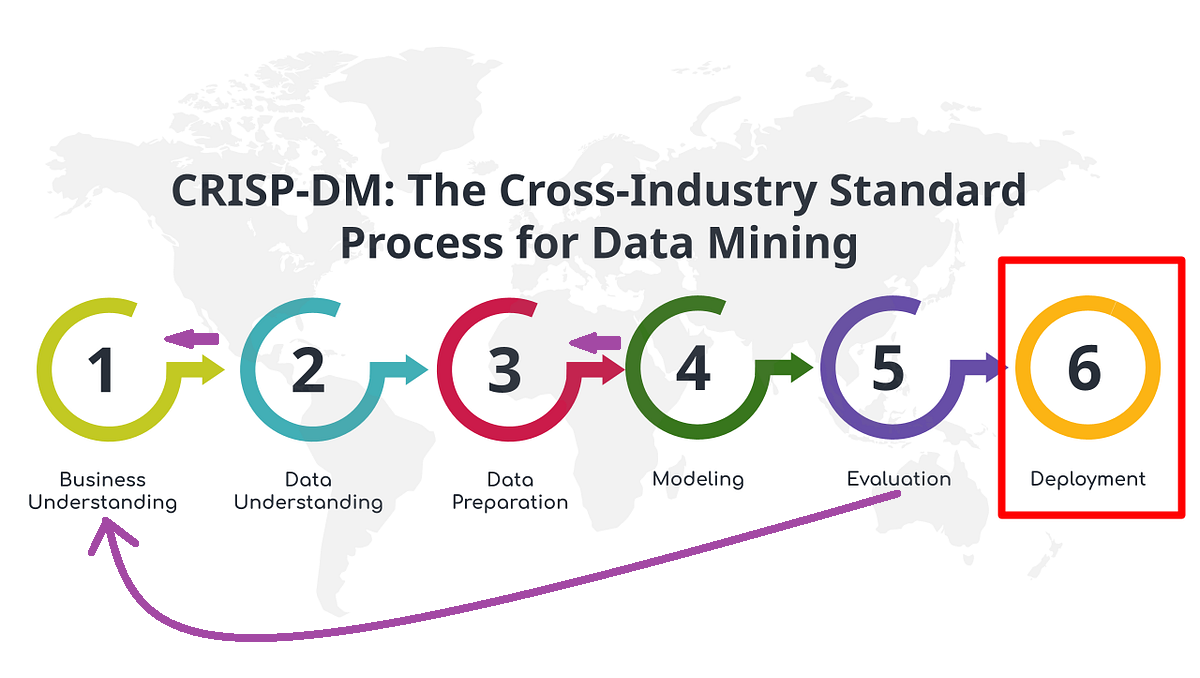

## Business Understanding

##### Business Problem/ Goals
        - The objective here is to develop a Machine Learning model to predict CO2 emissions based on various vehicle attributes.
        - Deploy the results using Flask/ Streamlit.

        - Dataset Details:
            make -> car brand under study
            model -> the specific model of the car
            vehicle_class -> car body type of the car
            engine_size -> the size of the car engine(in Litres)
            cylinders -> the number of cylinders
            transmission -> 'A': "Automatic", 'AM': "Automated manual", 'AS': "Automatic with select shift", 
                            'AV': "Continuously variable", 'M': "Manual"
            fuel_type -> 'X': "Regular gasoline", 'Z': "Premium gasoline", 'D': "Diesel", 'E': "Ethanol(E85)", 'N': "Natural gas"
            fuel_consumption_city -> City fuel consumption ratings, (in litres per 100 KM)
            fuel_consumption_hwy -> Highway fuel consumption ratings, (in litres per 100 KM)
            fuel_consumption_comb(l/100KM) -> the combined fuel consumption rating (55% city, 45% highway), in l/100KM
            fuel_consumption_comb(mpg) -> the combined fuel consumption rating(55% city, 45% highway),(in miles/gallon = mpg)
            co2_emissions -> the tailpipe emissions of carbon dioxide for combined city and highway driving,(in grams/KM)

## Data Understanding

        Importing required libraries

In [1]:
!pip install category_encoders


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

        Loading and Inspecting the dataset

In [3]:
# Loading dataset
df = pd.read_csv('co2_emissions.csv',sep=';')

In [4]:
# Displaying first few rows
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [5]:
# Summary Statistics
df.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [6]:
# Summary Statistics for all the columns including categorical
df.describe(include='all')

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
count,7385,7385,7385,7385.000000,7385.000000,7385,7385,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
unique,42,2053,16,NaN,NaN,5,5,NaN,NaN,NaN,NaN,NaN
top,FORD,F-150 FFV 4X4,SUV - SMALL,NaN,NaN,AS,X,NaN,NaN,NaN,NaN,NaN
freq,628,32,1217,NaN,NaN,3127,3637,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.160068,5.615030,NaN,NaN,12.556534,9.041706,10.975071,27.481652,250.584699
std,NaN,NaN,NaN,1.354170,1.828307,NaN,NaN,3.500274,2.224456,2.892506,7.231879,58.512679
min,NaN,NaN,NaN,0.900000,3.000000,NaN,NaN,4.200000,4.000000,4.100000,11.000000,96.000000
25%,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.100000,7.500000,8.900000,22.000000,208.000000
50%,NaN,NaN,NaN,3.000000,6.000000,NaN,NaN,12.100000,8.700000,10.600000,27.000000,246.000000
75%,NaN,NaN,NaN,3.700000,6.000000,NaN,NaN,14.600000,10.200000,12.600000,32.000000,288.000000


        Verifying data Quality

In [7]:
# Checking if null values present in any column
df.isna().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

        There is no missing values in our dataset

In [8]:
# Checking for number of duplicate rows
df.duplicated().sum()

1112

In [9]:
# Displaying the duplicated rows present
df[df.duplicated()]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M,X,7.9,5.9,7.0,40,163


In [10]:
df['model'].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

      Since, the dataset contains 1112 duplicated rows, so we will  drop them during data cleaning steps as they do not play any role in model building, same data is repeating only. 

In [11]:
# Checking for duplicate columns
df.T.duplicated()

make                              False
model                             False
vehicle_class                     False
engine_size                       False
cylinders                         False
transmission                      False
fuel_type                         False
fuel_consumption_city             False
fuel_consumption_hwy              False
fuel_consumption_comb(l/100km)    False
fuel_consumption_comb(mpg)        False
co2_emissions                     False
dtype: bool

In [12]:
# Checking datatype of each columns 
df.dtypes

make                               object
model                              object
vehicle_class                      object
engine_size                       float64
cylinders                           int64
transmission                       object
fuel_type                          object
fuel_consumption_city             float64
fuel_consumption_hwy              float64
fuel_consumption_comb(l/100km)    float64
fuel_consumption_comb(mpg)          int64
co2_emissions                       int64
dtype: object

In [13]:
# Checking unqiue value counts of  columns having object datatype
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i," -> ",len(df[i].unique()),'\n')

make  ->  42 

model  ->  2053 

vehicle_class  ->  16 

transmission  ->  5 

fuel_type  ->  5 



In [14]:
df['vehicle_class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [15]:
df['vehicle_class'].value_counts()

SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: vehicle_class, dtype: int64

In [16]:
# Checking the shape of the dataset (rows,columns)
df.shape

(7385, 12)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

        Correlation Analysis

C:\Users\rames\AppData\Local\Temp\ipykernel_14080\800404880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


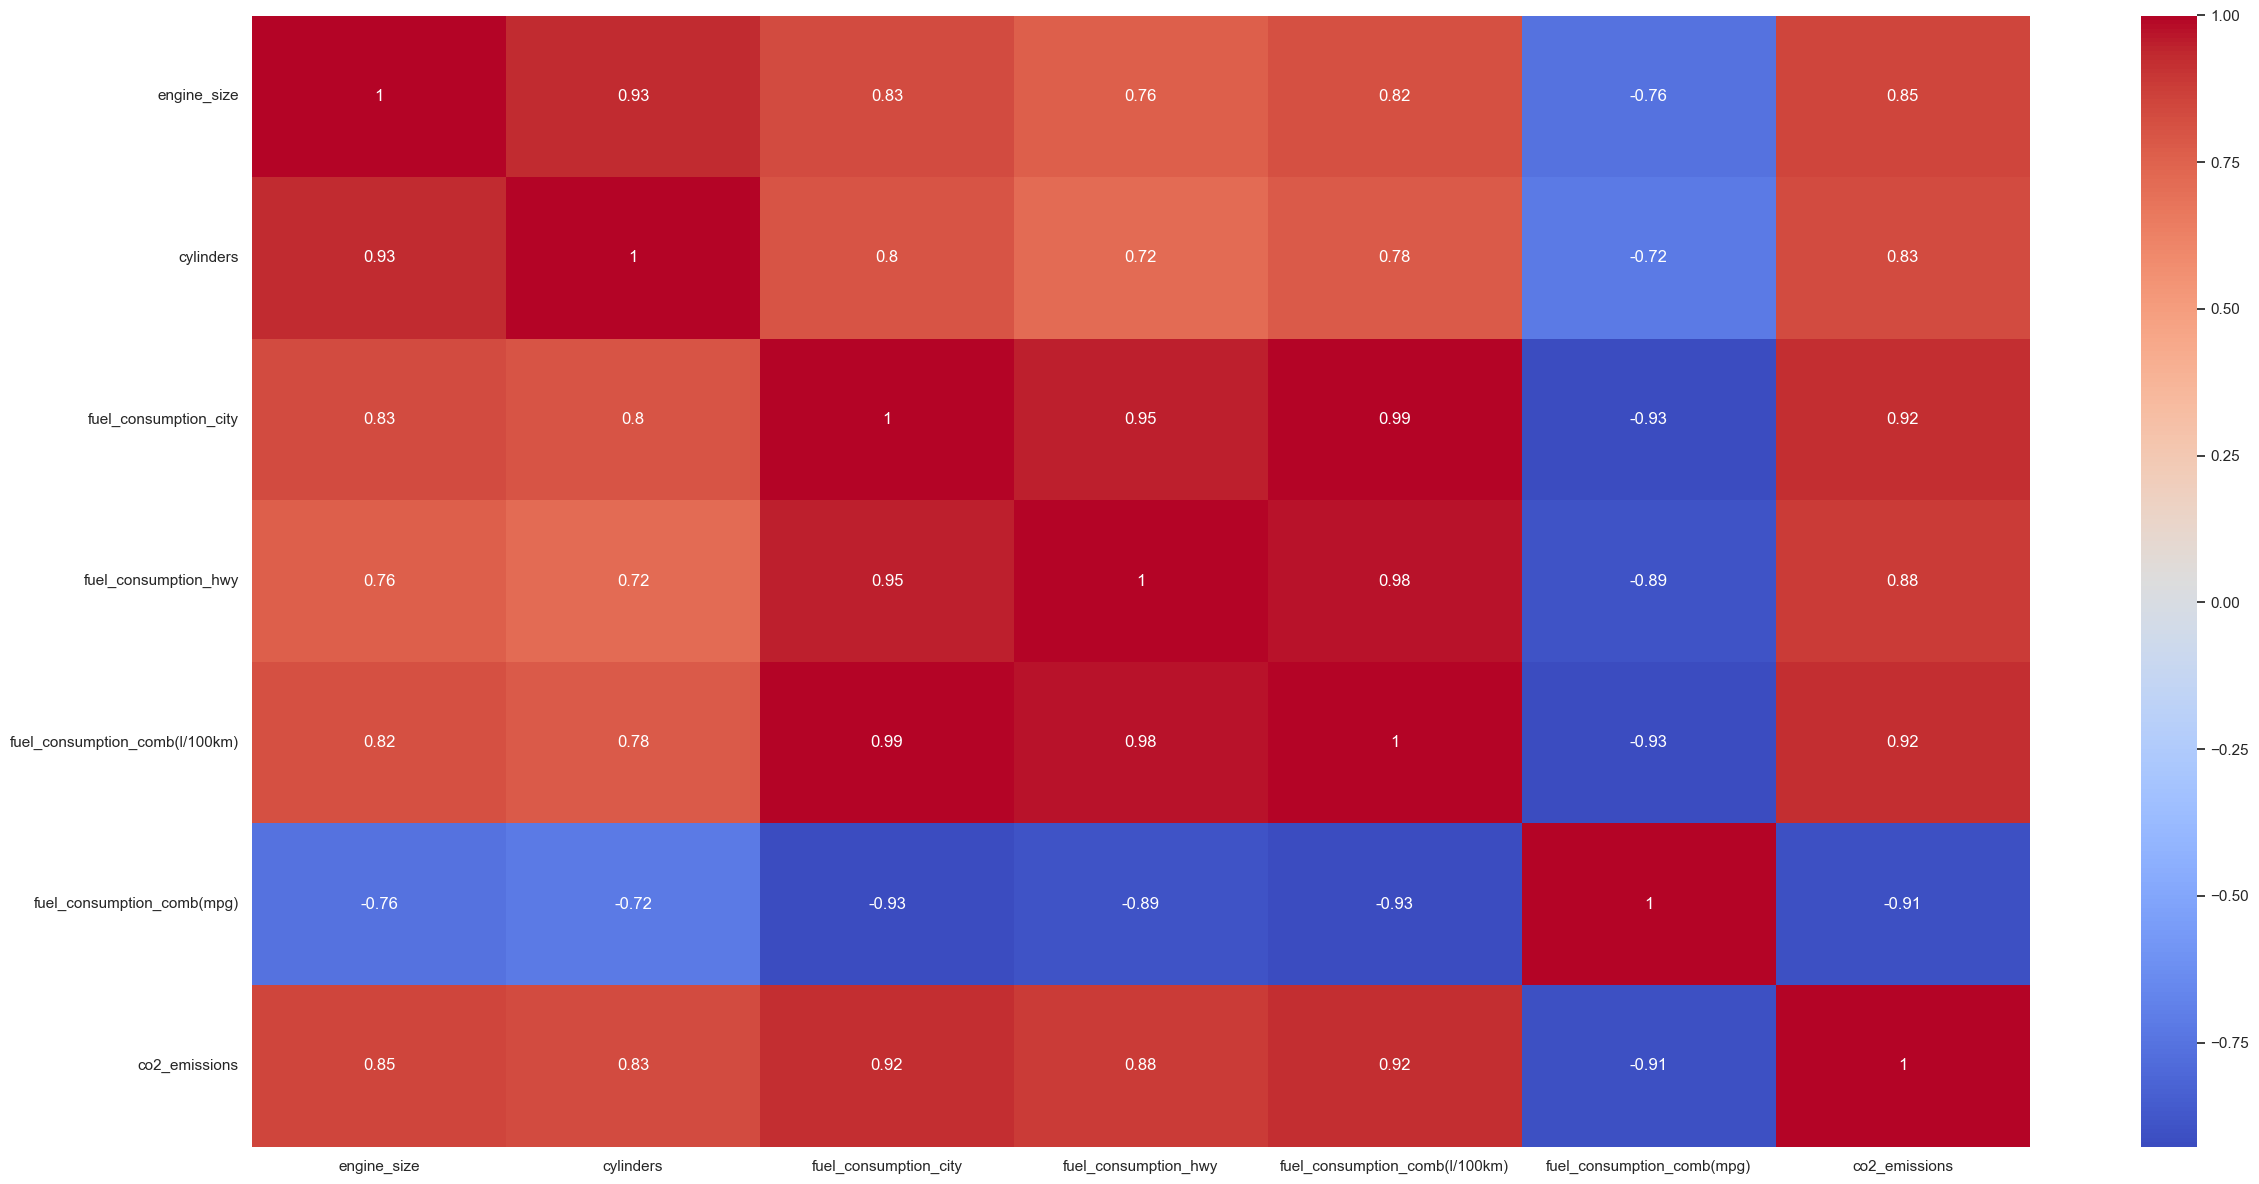

In [18]:
corr_mat = df.corr()
sns.set(style='whitegrid')
plt.figure(figsize=(25,12))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')
plt.tight_layout()

        Outlier Detection

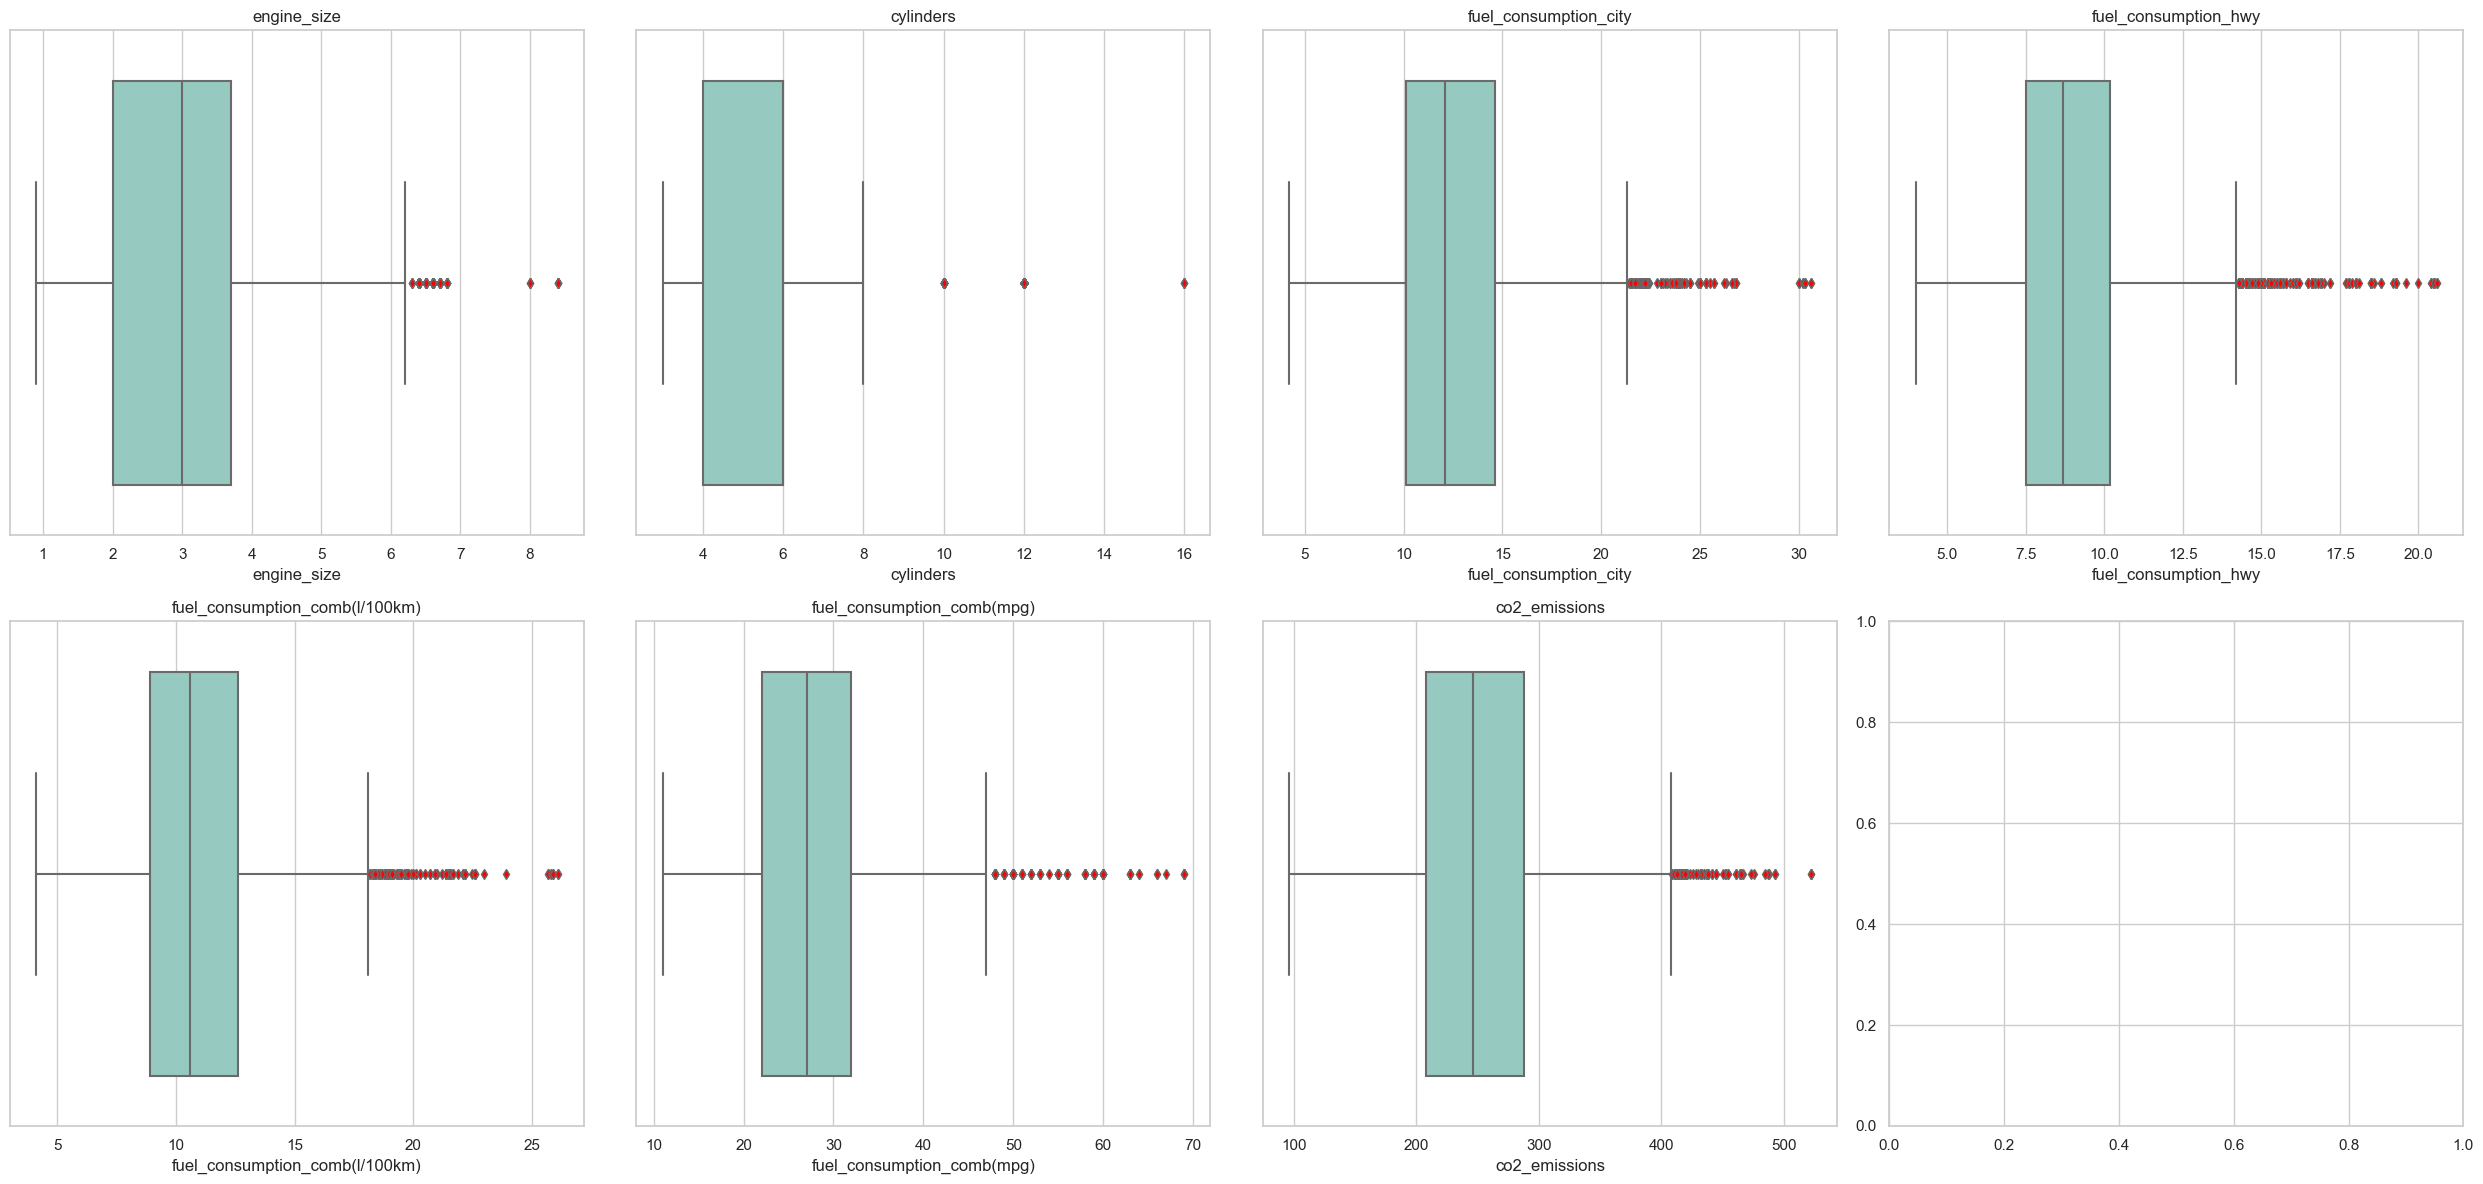

In [19]:
# Boxplot to check the outliers and distributiom of the data, where we can see all numeric columns shows outliers in the data.

df1 = df[[i for i in df.columns if df[i].dtypes == 'float64' or df[i].dtypes == 'int64']]
sns.set(style='whitegrid')
fig,axes = plt.subplots(2,4,figsize=(25,12))
custom_palette = sns.color_palette("Set3")
axes = axes.flatten()

for i, col in enumerate(df1.columns):
    sns.boxplot(x=df1[col],ax=axes[i],palette=custom_palette,flierprops=dict(markerfacecolor='red'))
    axes[i].set_title(col)

plt.tight_layout()

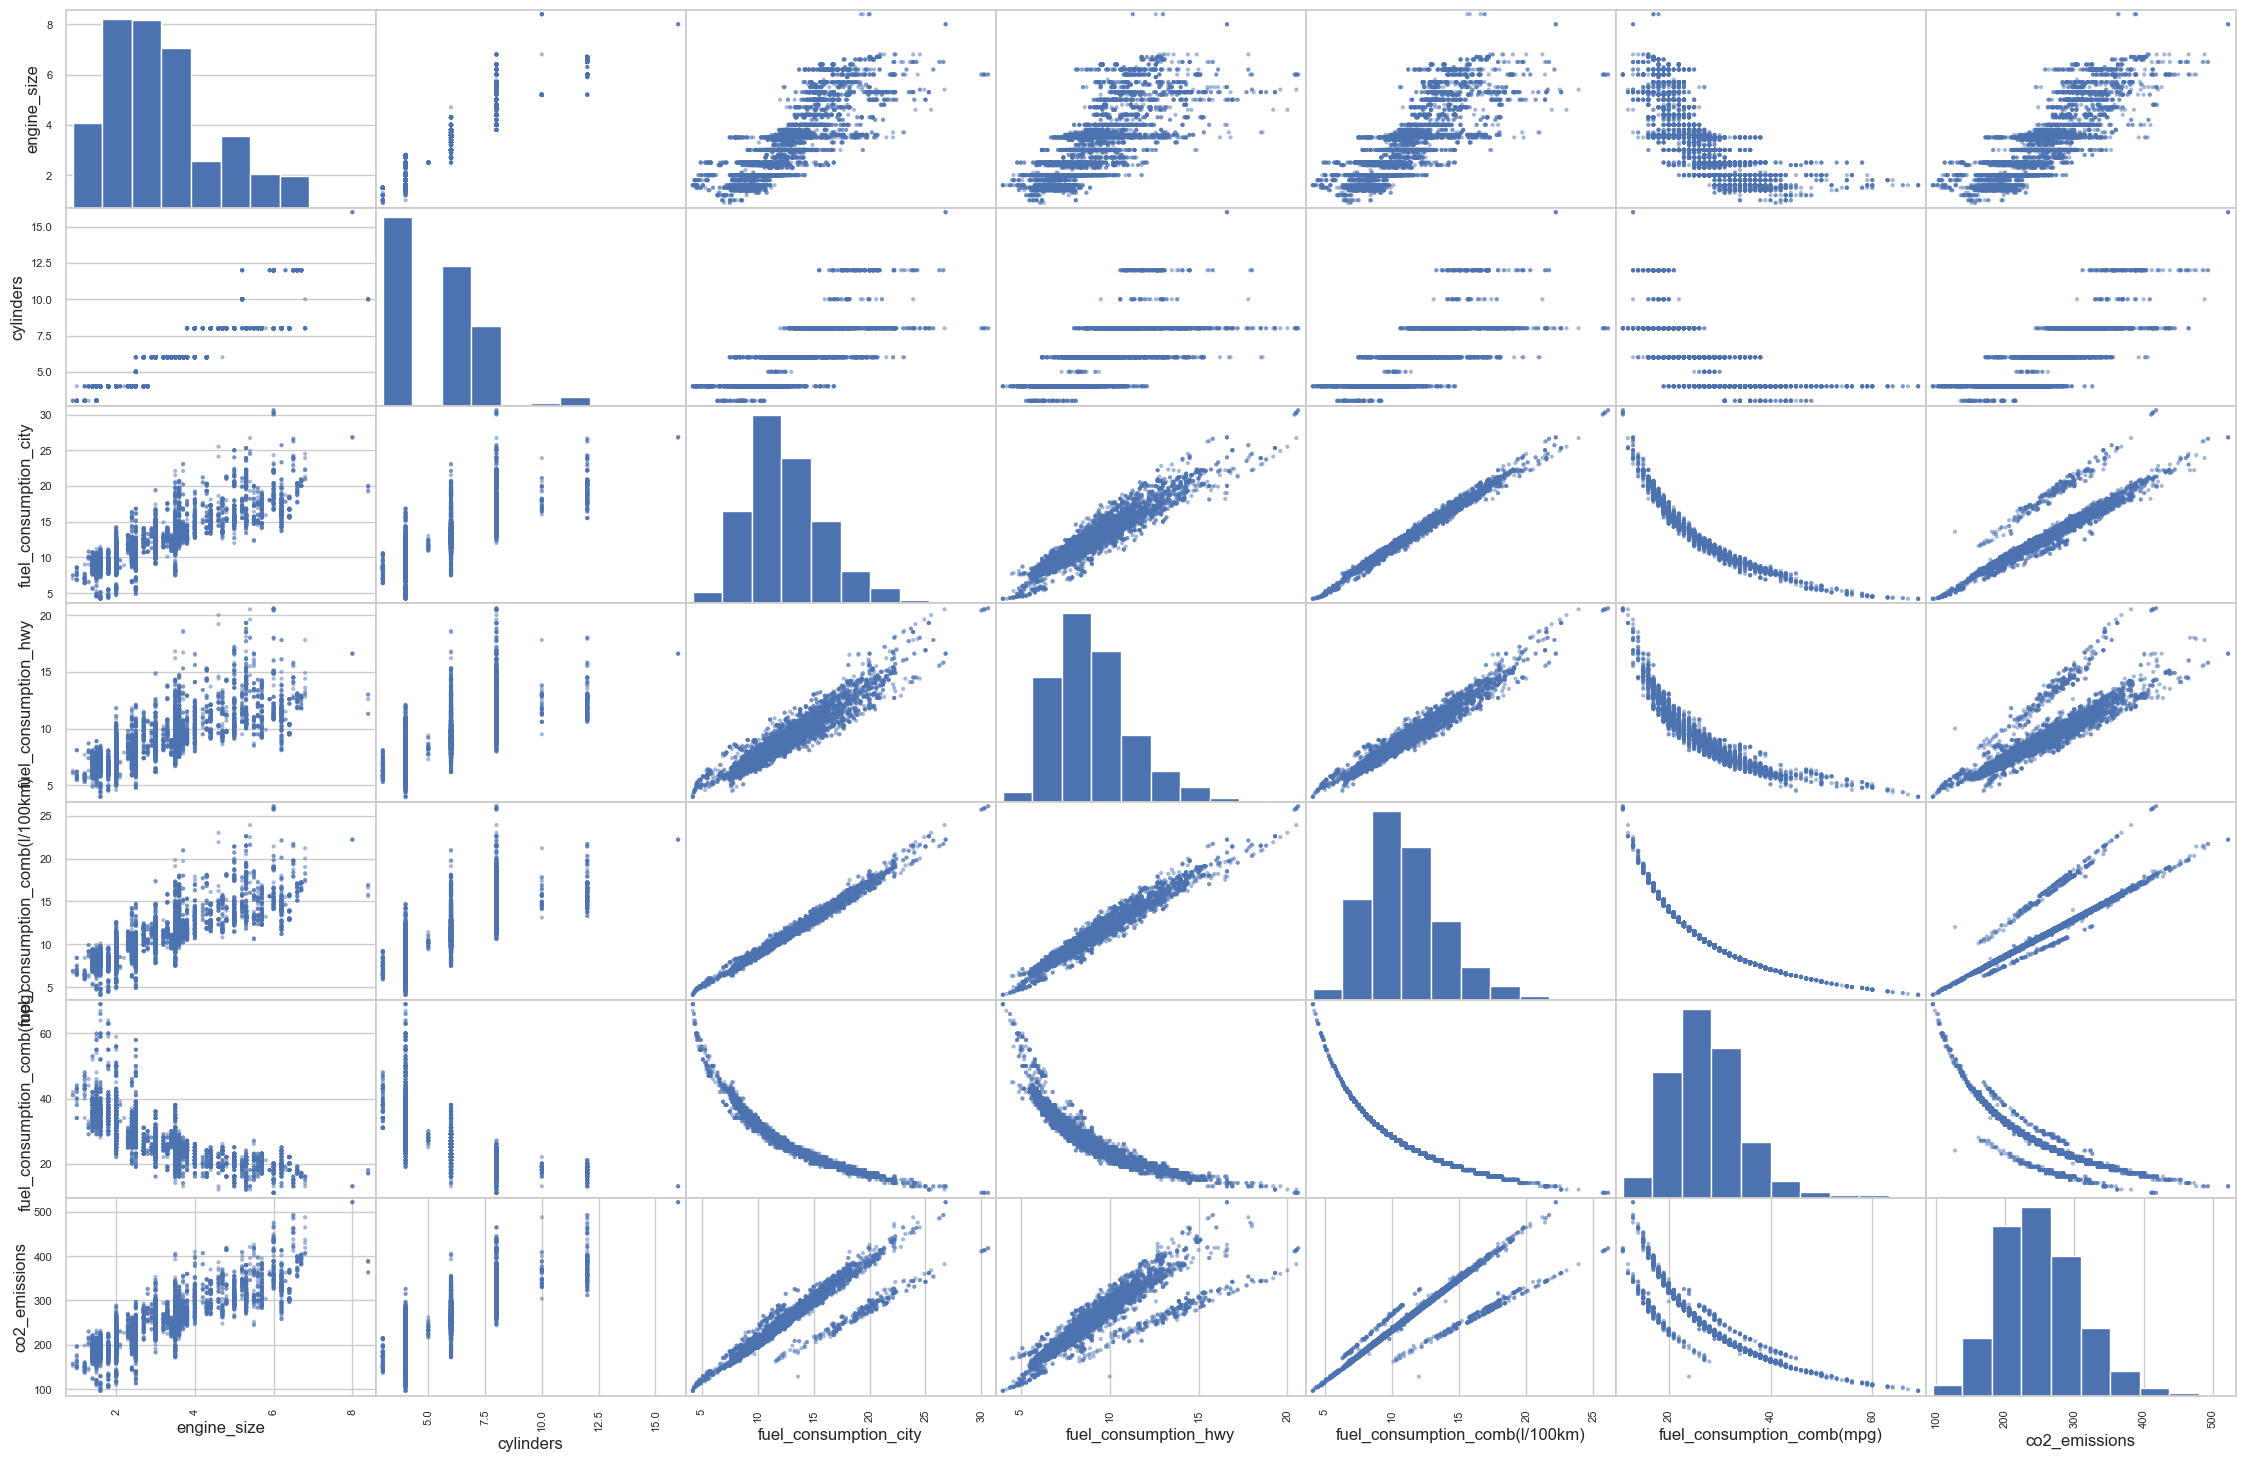

In [20]:
scatter_matrix(df,figsize=(28,18))
plt.show()

## Data Preparation

        Data Cleaning

In [21]:
# Dropping null values, however no null values present in our dataset.
df = df.dropna()

In [22]:
df = df.drop_duplicates()

In [23]:
df.shape

(6273, 12)

In [24]:
df.duplicated().sum()

0

In [25]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [26]:
df.dtypes

make                               object
model                              object
vehicle_class                      object
engine_size                       float64
cylinders                           int64
transmission                       object
fuel_type                          object
fuel_consumption_city             float64
fuel_consumption_hwy              float64
fuel_consumption_comb(l/100km)    float64
fuel_consumption_comb(mpg)          int64
co2_emissions                       int64
dtype: object

        Feature Engineering

In [27]:
df['cylinders'] = df['cylinders'].astype('category')
df.dtypes

make                                object
model                               object
vehicle_class                       object
engine_size                        float64
cylinders                         category
transmission                        object
fuel_type                           object
fuel_consumption_city              float64
fuel_consumption_hwy               float64
fuel_consumption_comb(l/100km)     float64
fuel_consumption_comb(mpg)           int64
co2_emissions                        int64
dtype: object

In [28]:
df['vehicle_class'].value_counts()

SUV - SMALL                 1004
MID-SIZE                     981
COMPACT                      902
SUV - STANDARD               613
SUBCOMPACT                   532
FULL-SIZE                    508
PICKUP TRUCK - STANDARD      474
TWO-SEATER                   381
MINICOMPACT                  274
STATION WAGON - SMALL        212
PICKUP TRUCK - SMALL         133
VAN - PASSENGER               66
SPECIAL PURPOSE VEHICLE       65
MINIVAN                       61
STATION WAGON - MID-SIZE      45
VAN - CARGO                   22
Name: vehicle_class, dtype: int64

In [29]:
df1 = df.copy()

le_cols = df1[['transmission','fuel_type']]
te_cols =  df1[['make','model','vehicle_class']]

le = LabelEncoder()
for i in le_cols:
    df1[i] = le.fit_transform(df1[i])



# Defining a threshold for the number of counts to consider as common
threshold_vehicle_class = 100  

# Identifying the most common categories and grouping the rest into 'OTHER'
common_categories = df1['vehicle_class'].value_counts()[df1['vehicle_class'].value_counts() >= threshold_vehicle_class].index
df1['vehicle_class'] = df1['vehicle_class'].apply(lambda x: x if x in common_categories else 'OTHER')

# Target encoding 'vehicle_class' including 'OTHER'
target_encoder = ce.TargetEncoder(cols=['vehicle_class','make','model'])
encoded_cols = target_encoder.fit_transform(df1[['vehicle_class','make','model']], df1['co2_emissions'])
encoded_cols.rename(columns={'vehicle_class':'vehicle_class_encoded','make':'make_encoded','model':'model_encoded'},inplace=True)
df1 = pd.concat([df1,encoded_cols],axis=1)
df1

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,vehicle_class_encoded,make_encoded,model_encoded
0,ACURA,ILX,COMPACT,2.0,4,2,4,9.9,6.7,8.5,33,196,217.707317,222.941804,240.333072
1,ACURA,ILX,COMPACT,2.4,4,4,4,11.2,7.7,9.6,29,221,217.707317,222.941804,240.333072
2,ACURA,ILX HYBRID,COMPACT,1.5,4,3,4,6.0,5.8,5.9,48,136,217.707317,222.941804,235.183007
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,2,4,12.7,9.1,11.1,25,255,236.518924,222.941804,251.735515
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,2,4,12.1,8.7,10.6,27,244,236.518924,222.941804,249.987850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,2,4,10.7,7.7,9.4,30,219,236.518924,229.950333,246.105539
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,2,4,11.2,8.3,9.9,29,232,236.518924,229.950333,249.088302
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,2,4,11.7,8.6,10.3,27,240,236.518924,229.950333,250.571922
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,2,4,11.2,8.3,9.9,29,232,306.730832,229.950333,248.140052


In [30]:
df2 = df1[['make_encoded','model_encoded','vehicle_class_encoded','engine_size','cylinders','transmission','fuel_type','fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb(l/100km)','fuel_consumption_comb(mpg)','co2_emissions']]
df2

,make_encoded,model_encoded,vehicle_class_encoded,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,222.941804,240.333072,217.707317,2.0,4,2,4,9.9,6.7,8.5,33,196
1,222.941804,240.333072,217.707317,2.4,4,4,4,11.2,7.7,9.6,29,221
2,222.941804,235.183007,217.707317,1.5,4,3,4,6.0,5.8,5.9,48,136
3,222.941804,251.735515,236.518924,3.5,6,2,4,12.7,9.1,11.1,25,255
4,222.941804,249.987850,236.518924,3.5,6,2,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,229.950333,246.105539,236.518924,2.0,4,2,4,10.7,7.7,9.4,30,219
7381,229.950333,249.088302,236.518924,2.0,4,2,4,11.2,8.3,9.9,29,232
7382,229.950333,250.571922,236.518924,2.0,4,2,4,11.7,8.6,10.3,27,240
7383,229.950333,248.140052,306.730832,2.0,4,2,4,11.2,8.3,9.9,29,232


In [31]:
df2.shape

(6273, 12)

# M4

In [32]:
df2 = df1[['make_encoded','model_encoded','vehicle_class_encoded','engine_size','cylinders','transmission','fuel_type','fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb(l/100km)','co2_emissions']]
df2

,make_encoded,model_encoded,vehicle_class_encoded,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),co2_emissions
0,222.941804,240.333072,217.707317,2.0,4,2,4,9.9,6.7,8.5,196
1,222.941804,240.333072,217.707317,2.4,4,4,4,11.2,7.7,9.6,221
2,222.941804,235.183007,217.707317,1.5,4,3,4,6.0,5.8,5.9,136
3,222.941804,251.735515,236.518924,3.5,6,2,4,12.7,9.1,11.1,255
4,222.941804,249.987850,236.518924,3.5,6,2,4,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...,...,...,...,...
7380,229.950333,246.105539,236.518924,2.0,4,2,4,10.7,7.7,9.4,219
7381,229.950333,249.088302,236.518924,2.0,4,2,4,11.2,8.3,9.9,232
7382,229.950333,250.571922,236.518924,2.0,4,2,4,11.7,8.6,10.3,240
7383,229.950333,248.140052,306.730832,2.0,4,2,4,11.2,8.3,9.9,232


In [33]:
df2.shape

(6273, 11)

In [34]:
X = df2.drop('co2_emissions',axis=1)
y = df['co2_emissions']

In [35]:
sc = StandardScaler()
transformed_data = sc.fit_transform(X)
transformed_data

array([[-0.82330198, -0.88701104, -1.02329107, ..., -0.76489293,
        -1.04202235, -0.85646429],
       [-0.82330198, -0.88701104, -1.02329107, ..., -0.39872551,
        -0.60298509, -0.48292369],
       [-0.82330198, -1.31852269, -1.02329107, ..., -1.86339519,
        -1.43715588, -1.73937843],
       ...,
       [-0.61691609, -0.02912218, -0.44935571, ..., -0.25789189,
        -0.20785156, -0.24521604],
       [-0.61691609, -0.23288278,  1.69278431, ..., -0.39872551,
        -0.33956274, -0.38104898],
       [-0.61691609, -0.04051429,  1.69278431, ..., -0.11705827,
        -0.16394784, -0.10938309]])

In [36]:
cols = df2.columns
x_cols = cols[:-1]
x_cols

X = pd.DataFrame(transformed_data, columns=x_cols)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5018, 10), (1255, 10), (5018,), (1255,))

In [38]:
# Modeling

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Support Vector Regression', SVR())
]

results = []
for model_name, model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pred)
    mape = mean_absolute_percentage_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    results.append((model_name,mse,rmse,mae,mape,r2))

results_df = pd.DataFrame(results,columns=['Model','MSE','RMSE','MAE','MAPE','R-squared'])
best_model = results_df.loc[results_df['MSE'].idxmin()]
print('Model Performance: ')
results_df

Model Performance: 


,Model,MSE,RMSE,MAE,MAPE,R-squared
0,Linear Regression,292.728349,17.109306,12.003711,0.049256,0.918334
1,Decision Tree Regressor,16.754095,4.093177,2.258699,0.009105,0.995326
2,Random Forest Regressor,11.242442,3.352975,2.099888,0.008373,0.996864
3,Support Vector Regression,302.856853,17.402783,7.563339,0.029980,0.915509


# M3 

In [39]:
df3 = df1[['vehicle_class_encoded','engine_size','cylinders','transmission','fuel_type','fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb(l/100km)','fuel_consumption_comb(mpg)','co2_emissions']]
df3

,vehicle_class_encoded,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,217.707317,2.0,4,2,4,9.9,6.7,8.5,33,196
1,217.707317,2.4,4,4,4,11.2,7.7,9.6,29,221
2,217.707317,1.5,4,3,4,6.0,5.8,5.9,48,136
3,236.518924,3.5,6,2,4,12.7,9.1,11.1,25,255
4,236.518924,3.5,6,2,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...
7380,236.518924,2.0,4,2,4,10.7,7.7,9.4,30,219
7381,236.518924,2.0,4,2,4,11.2,8.3,9.9,29,232
7382,236.518924,2.0,4,2,4,11.7,8.6,10.3,27,240
7383,306.730832,2.0,4,2,4,11.2,8.3,9.9,29,232


In [40]:
X = df3.drop('co2_emissions',axis=1)
y = df['co2_emissions']

In [41]:
sc = StandardScaler()
transformed_data = sc.fit_transform(X)
transformed_data

array([[-1.02329107, -0.85189918, -0.87776438, ..., -1.04202235,
        -0.85646429,  0.77578604],
       [-1.02329107, -0.55889864, -0.87776438, ..., -0.60298509,
        -0.48292369,  0.22214488],
       [-1.02329107, -1.21814985, -0.87776438, ..., -1.43715588,
        -1.73937843,  2.85194039],
       ...,
       [-0.44935571, -0.85189918, -0.87776438, ..., -0.20785156,
        -0.24521604, -0.05467571],
       [ 1.69278431, -0.85189918, -0.87776438, ..., -0.33956274,
        -0.38104898,  0.22214488],
       [ 1.69278431, -0.85189918, -0.87776438, ..., -0.16394784,
        -0.10938309, -0.193086  ]])

In [42]:
df3.columns

Index(['vehicle_class_encoded', 'engine_size', 'cylinders', 'transmission',
       'fuel_type', 'fuel_consumption_city', 'fuel_consumption_hwy',
       'fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)',
       'co2_emissions'],
      dtype='object')

In [43]:
cols = df3.columns
x_cols = cols[:-1]
x_cols

X = pd.DataFrame(transformed_data, columns=x_cols)

In [44]:
X

,vehicle_class_encoded,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg)
0,-1.023291,-0.851899,-0.877764,0.134229,0.825785,-0.764893,-1.042022,-0.856464,0.775786
1,-1.023291,-0.558899,-0.877764,1.643223,0.825785,-0.398726,-0.602985,-0.482924,0.222145
2,-1.023291,-1.218150,-0.877764,0.888726,0.825785,-1.863395,-1.437156,-1.739378,2.851940
3,-0.449356,0.246853,0.205497,0.134229,0.825785,0.023775,0.011667,0.026450,-0.331496
4,-0.449356,0.246853,0.205497,0.134229,0.825785,-0.145225,-0.163948,-0.143341,-0.054676
...,...,...,...,...,...,...,...,...,...
6268,-0.449356,-0.851899,-0.877764,0.134229,0.825785,-0.539559,-0.602985,-0.550840,0.360555
6269,-0.449356,-0.851899,-0.877764,0.134229,0.825785,-0.398726,-0.339563,-0.381049,0.222145
6270,-0.449356,-0.851899,-0.877764,0.134229,0.825785,-0.257892,-0.207852,-0.245216,-0.054676
6271,1.692784,-0.851899,-0.877764,0.134229,0.825785,-0.398726,-0.339563,-0.381049,0.222145


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5018, 9), (1255, 9), (5018,), (1255,))

In [46]:
# Modeling

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Support Vector Regression', SVR())
]

results = []
for model_name, model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    results.append((model_name,mse,r2))

results_df = pd.DataFrame(results,columns=['Model','MSE','R-squared'])
best_model = results_df.loc[results_df['MSE'].idxmin()]
print('Model Performance: ')
results_df

Model Performance: 


,Model,MSE,R-squared
0,Linear Regression,337.845240,0.905748
1,Decision Tree Regressor,12.278281,0.996575
2,Random Forest Regressor,9.748076,0.997280
3,Support Vector Regression,278.370160,0.922340


# M1

In [47]:
X = df.drop('co2_emissions',axis=1)
y = df['co2_emissions']

In [48]:
X

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg)
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27
...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29


In [49]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: co2_emissions, Length: 6273, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5018, 11), (1255, 11), (5018,), (1255,))

##  Final Model

In [91]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
from preprocessing  import convert_dtype, MultiColumnLabelEncoder
# Loading the dataset
df = pd.read_csv('co2_emissions.csv', sep=';')

# Defining the feature transformation steps
feature_transform = ColumnTransformer(
    transformers=[
        ('label_encoder', MultiColumnLabelEncoder(columns=['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']),
         ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']),
    ]
)

# Using FunctionTransformer to make convert_dtype compatible with ColumnTransformer
data_cleaning = FunctionTransformer(convert_dtype, validate=False)

# Combining the steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('data_cleaning', data_cleaning, ['fuel_consumption_comb(mpg)', 'cylinders']),
        ('feature_transform', feature_transform, ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type'])
    ]
)

# Creating the final pipeline with Linear Regression model
lin_reg_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

set_config(display='diagram')

# Splitting the data into train and test sets
X = df.drop('co2_emissions', axis=1)
y = df['co2_emissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the pipeline on the dataset
lin_reg_pipe.fit(X_train, y_train)

# Evaluating the model
test_score = lin_reg_pipe.score(X_test, y_test)
y_pred = lin_reg_pipe.predict(X_test)
print(f'R2 score on test data: {test_score:.2f}')

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('\n\nmse ',mse)
print('rmse ',rmse)
print('mae ',mae)
print('mape ',mape)
print('r2: ',r2)
print('\n\n')
lin_reg_pipe

R2 score on test data: 0.90


mse  353.872535118043
rmse  18.81150007623111
mae  12.868001253738488
mape  0.05158698998830435
r2:  0.8971189339802288





Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('data_cleaning',
                                                  FunctionTransformer(func=<function convert_dtype at 0x000001B849149580>),
                                                  ['fuel_consumption_comb(mpg)',
                                                   'cylinders']),
                                                 ('feature_transform',
                                                  ColumnTransformer(transformers=[('label_encoder',
                                                                                   MultiColumnLabelEncoder(columns=['make',
                                                                                                                    'model',
                                                                                                                    'vehicle_class',
                                                                                                                    'transmission',
                                                                                                                    'fuel_type']),
                                                                                   ['make',
                                                                                    'model',
                                                                                    'vehicle_class',
                                                                                    'transmission',
                                                                                    'fuel_type'])]),
                                                  ['make', 'model',
                                                   'vehicle_class',
                                                   'transmission',
                                                   'fuel_type'])])),
                ('model', LinearRegression())])

In [86]:
# Now you can use the pipeline for prediction
# For example:
new_data = pd.DataFrame({'make': ['ACURA'], 'model': ['ILX'], 'vehicle_class': ['COMPACT'], 'engine_size': [2.0], 'cylinders': [4],
                         'transmission': ['AS'], 'fuel_type': ['Z'], 'fuel_consumption_city': [9.9], 'fuel_consumption_hwy': [6.7],
                         'fuel_consumption_comb(l/100km)': [8.5],'fuel_consumption_comb(mpg)': [33]})
prediction = lin_reg_pipe.predict(new_data)
prediction

array([189.51577178])

In [92]:
import joblib
joblib.dump(lin_reg_pipe, 'co2_emit_pred_model.pkl')

['model.pkl']

In [93]:
joblib.load('co2_emit_pred_model.pkl')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('data_cleaning',
                                                  FunctionTransformer(func=<function convert_dtype at 0x000001B849149580>),
                                                  ['fuel_consumption_comb(mpg)',
                                                   'cylinders']),
                                                 ('feature_transform',
                                                  ColumnTransformer(transformers=[('label_encoder',
                                                                                   MultiColumnLabelEncoder(columns=['make',
                                                                                                                    'model',
                                                                                                                    'vehicle_class',
                                                                                                                    'transmission',
                                                                                                                    'fuel_type']),
                                                                                   ['make',
                                                                                    'model',
                                                                                    'vehicle_class',
                                                                                    'transmission',
                                                                                    'fuel_type'])]),
                                                  ['make', 'model',
                                                   'vehicle_class',
                                                   'transmission',
                                                   'fuel_type'])])),
                ('model', LinearRegression())])

## Evaluation

In [ ]:
y_pred = lin_reg_pipe.predict(X_test)
print(f'R2 score on test data: {test_score:.2f}')

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('\n\nmse ',mse)
print('rmse ',rmse)
print('mae ',mae)
print('mape ',mape)
print('r2: ',r2)

## Deployment

        Streamlit Deployment

            To Install: pip install streamlit
            To Run: streamlit run app.py

In [ ]:
# app.py

import streamlit as st
import joblib
import pandas as pd

# Load the pre-trained model
model = joblib.load('co2_emit_pred_model.pkl')

# Function to preprocess user input
def preprocess_input(input_df):
    input_df['cylinders'] = input_df['cylinders'].astype('category')
    return input_df

# Function to predict CO2 emissions
def predict_co2_emissions(features):
    input_data = pd.DataFrame(features, index=[0])
    preprocessed_input = preprocess_input(input_data)
    prediction = model.predict(preprocessed_input)[0]
    return prediction

# Loading the dataset
df = pd.read_csv('co2_emissions.csv', sep=';')

# Streamlit UI
st.markdown(
    """
    <div style="font-family: Times New Roman; font-size:50px;">
        CO2 Emissions Prediction
    </div>
    """, 
    unsafe_allow_html=True
)
# User input form
st.sidebar.header('User Input')
make = st.sidebar.selectbox('Make', df['make'].unique())
model_name = st.sidebar.selectbox('Model', df['model'].unique())
vehicle_class = st.sidebar.selectbox('Vehicle Class', df['vehicle_class'].unique())
engine_size = st.sidebar.slider('Engine Size', min_value=float(df['engine_size'].min()), max_value=float(df['engine_size'].max()), step=0.1)
cylinders = st.sidebar.slider('Cylinders', min_value=float(df['cylinders'].min()), max_value=float(df['cylinders'].max()), step=1.0)
transmission = st.sidebar.selectbox('Transmission', df['transmission'].unique())
fuel_type = st.sidebar.selectbox('Fuel Type', df['fuel_type'].unique())
fuel_consumption_city = st.sidebar.slider('Fuel Consumption City (l/100km)', min_value=float(df['fuel_consumption_city'].min()), max_value=float(df['fuel_consumption_city'].max()), step=0.1)
fuel_consumption_hwy = st.sidebar.slider('Fuel Consumption Hwy (l/100km)', min_value=float(df['fuel_consumption_hwy'].min()), max_value=float(df['fuel_consumption_hwy'].max()), step=0.1)
fuel_consumption_comb_l100km = st.sidebar.slider('Fuel Consumption Comb (l/100km)', min_value=float(df['fuel_consumption_comb(l/100km)'].min()), max_value=float(df['fuel_consumption_comb(l/100km)'].max()), step=0.1)
fuel_consumption_comb_mpg = st.sidebar.slider('Fuel Consumption Comb (mpg)', min_value=float(df['fuel_consumption_comb(mpg)'].min()), max_value=float(df['fuel_consumption_comb(mpg)'].max()), step=1.0)

# User input features
user_input = {
    'make': make,
    'model': model_name,
    'vehicle_class': vehicle_class,
    'engine_size': engine_size,
    'cylinders': cylinders,
    'transmission': transmission,
    'fuel_type': fuel_type,
    'fuel_consumption_city': fuel_consumption_city,
    'fuel_consumption_hwy': fuel_consumption_hwy,
    'fuel_consumption_comb(l/100km)': fuel_consumption_comb_l100km,
    'fuel_consumption_comb(mpg)': fuel_consumption_comb_mpg
}

# Prediction
if st.sidebar.button('Predict CO2 Emissions'):
    prediction = predict_co2_emissions(user_input)
    st.success(f'Predicted CO2 Emissions is: {prediction:.2f} grams/KM')

# Adding "Developed by Samit Dhawal" at the bottom right
st.markdown(
    """
    <div style="position: fixed; bottom: 15px; right: 20px; text-align: right; font-size:15px; font-family: Courier new">
        Developed by <span style="font-family: Brush Script MT; font-size:25px"><a href=https://linkedin.com/in/samit-dhawal/ style="color:#ff4b4b" >Samit Dhawal </a></span>
    </div>
    """, 
    unsafe_allow_html=True
)